<a href="https://colab.research.google.com/github/Shubham-Niture/Stock-Market-Analysis/blob/main/Stock_Market_analysis_with_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=843014 sha256=1e680abd1c001d26a8f14f72ffffe7ec6d1b888200508ea1cb43fe2ea3c4559f
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838

[*********************100%***********************]  1 of 1 completed


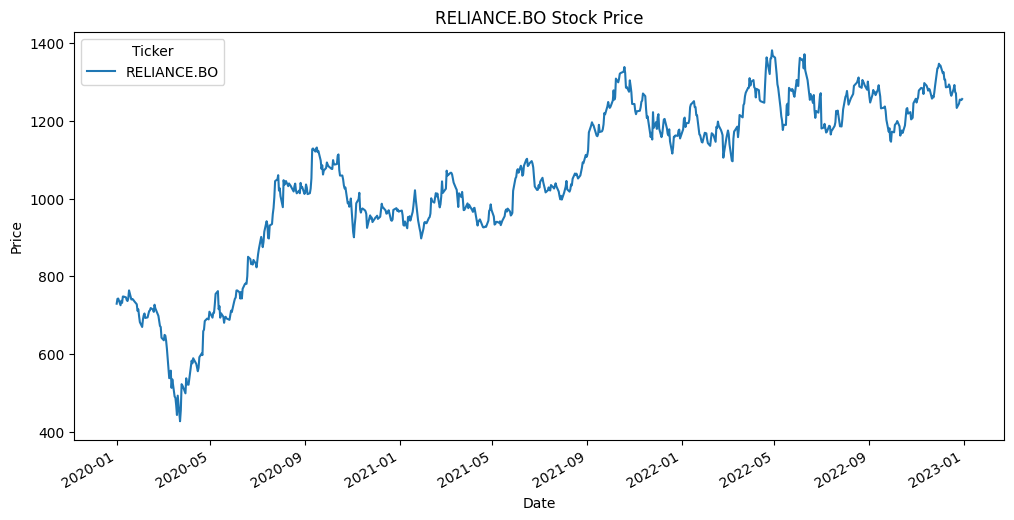

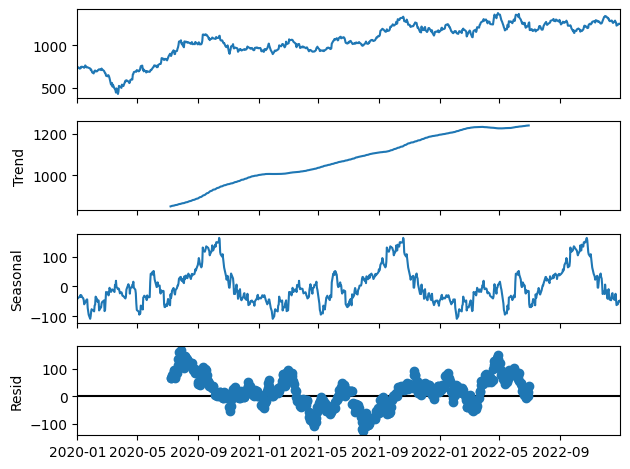

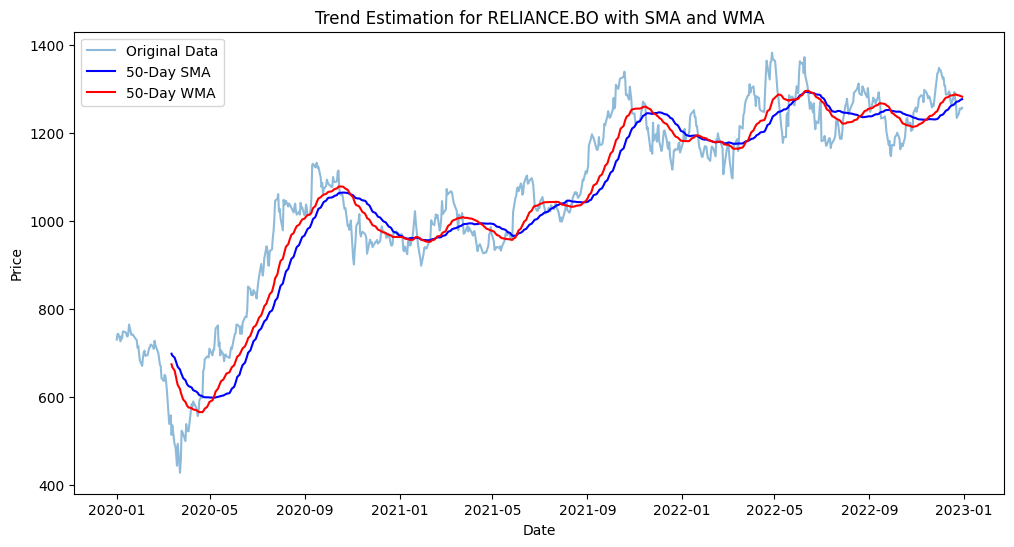

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


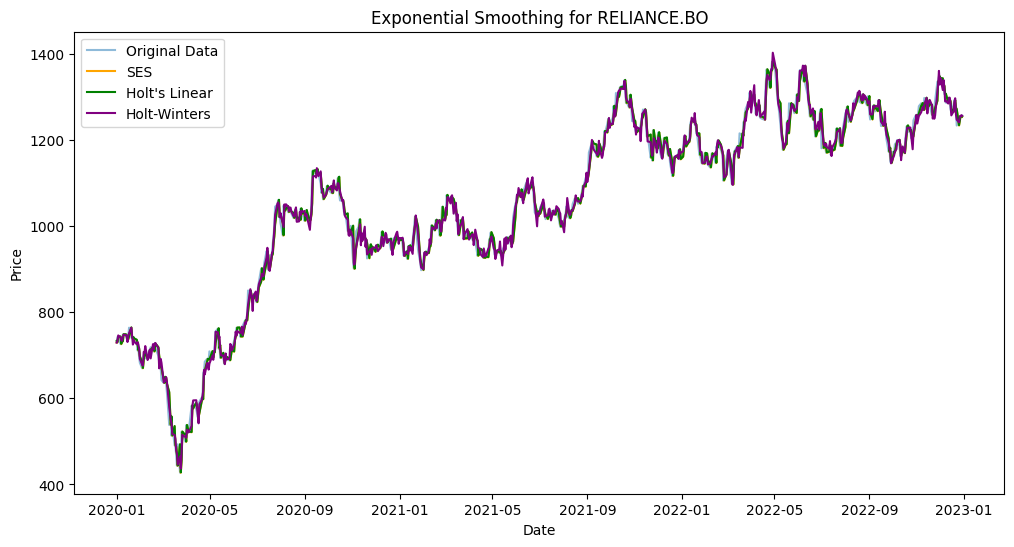

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

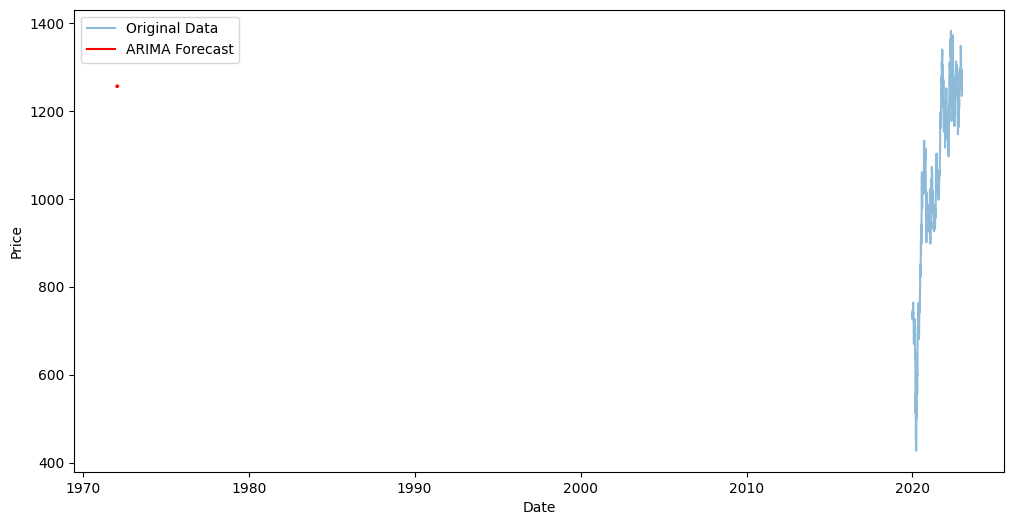

Sentiment Analysis Results:
        Keyword  Sentiment
0      Reliance        0.0
1           Oil        0.0
2        Energy        0.0
3  Green Energy       -0.2
4  Stock Market        0.0
Overall Sentiment Impact: Negative


In [3]:
!pip install statsmodels yfinance textblob requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import yfinance as yf
from textblob import TextBlob
import requests

# Step 1: Fetch stock data using yfinance
# Using yfinance API to download historical stock data for a specific stock.
# Example: Reliance Industries on BSE from January 2020 to January 2023.
stock_ticker = "RELIANCE.BO"
data = yf.download(stock_ticker, start="2020-01-01", end="2023-01-01")
data = data["Close"]

# Step 2: Plot the stock price
# Visualize the historical stock prices to understand trends and fluctuations.
data.plot(figsize=(12, 6), title=f"{stock_ticker} Stock Price", ylabel="Price")
plt.show()

# Step 3: Decompose the time series
# Break down the time series into trend, seasonal, and residual components for better analysis.
decompose_result = seasonal_decompose(data, model='additive', period=252)
decompose_result.plot()
plt.show()

# Step 4: Simple Moving Average (SMA) and Weighted Moving Average (WMA)
# Calculate SMA and WMA to smooth the data and identify underlying trends.
sma = data.rolling(window=50).mean()
weights = np.arange(1, 51)
wma = data.rolling(window=50).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data", alpha=0.5)
plt.plot(sma, label="50-Day SMA", color="blue")
plt.plot(wma, label="50-Day WMA", color="red")
plt.title(f"Trend Estimation for {stock_ticker} with SMA and WMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 5: Exponential Smoothing
# Use different types of exponential smoothing methods to model and forecast stock prices.
ses_model = ExponentialSmoothing(data, seasonal=None).fit()
ses_fitted = ses_model.fittedvalues

holt_model = ExponentialSmoothing(data, trend="add", seasonal=None).fit()
holt_fitted = holt_model.fittedvalues

hw_model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=252).fit()
hw_fitted = hw_model.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data", alpha=0.5)
plt.plot(ses_fitted, label="SES", color="orange")
plt.plot(holt_fitted, label="Holt's Linear", color="green")
plt.plot(hw_fitted, label="Holt-Winters", color="purple")
plt.title(f"Exponential Smoothing for {stock_ticker}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: ARIMA Model
# Fit an ARIMA model to forecast stock prices based on historical data.
arima_model = ARIMA(data, order=(2, 1, 2)).fit()
arima_forecast = arima_model.forecast(steps=30)

# Step 7: SARIMA Model
# Fit a SARIMA model to account for both seasonality and trends in the stock price.
#sarima_model = SARIMAX(data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 252)).fit(disp=False)
#sarima_forecast = sarima_model.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data", alpha=0.5)
plt.plot(arima_forecast, label="ARIMA Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 8: Sentiment Analysis (Using related keywords)
# Perform sentiment analysis on key terms related to the stock to assess market sentiment.
keywords = ["Reliance", "Oil", "Energy", "Green Energy", "Stock Market"]

sentiments = []
for keyword in keywords:
    analysis = TextBlob(keyword)
    sentiments.append(analysis.sentiment.polarity)

sentiment_df = pd.DataFrame({
    "Keyword": keywords,
    "Sentiment": sentiments
})

print("Sentiment Analysis Results:")
print(sentiment_df)

# Step 9: Analyze the impact of sentiment on stock price
# Determine overall sentiment based on the average polarity of related keywords.
overall_sentiment = "Positive" if sentiment_df["Sentiment"].mean() > 0 else "Negative"
print(f"Overall Sentiment Impact: {overall_sentiment}")


